In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv('Height_weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

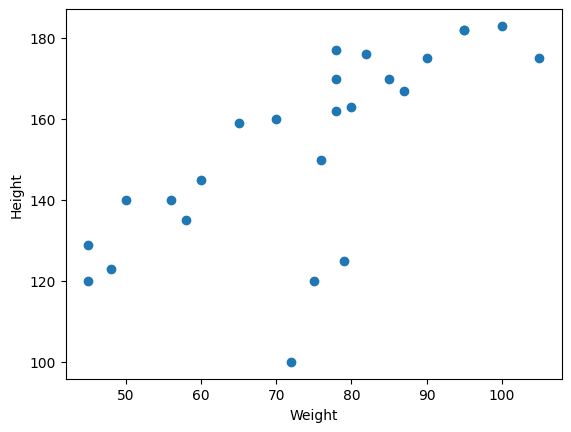

In [4]:
# Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
# Corelation
df.corr()

,Weight,Height
Weight,1.000000,0.719682
Height,0.719682,1.000000


In [6]:
# Use Seaborn for visualization
import seaborn as sns

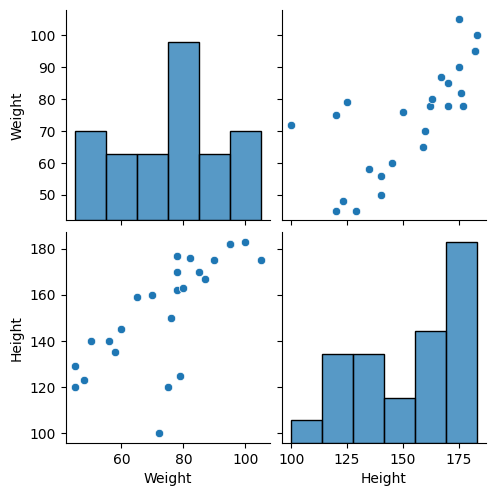

In [7]:
sns.pairplot(df)

In [8]:
# Dependant and Independant features
x_series= df['Weight']
x_series

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
23     75
24     79
Name: Weight, dtype: int64

In [9]:
type(x_series)

pandas.core.series.Series

In [10]:
# It will show that the x has no column, that means it is a one dimensional array.
np.array(x_series).shape

(25,)

#### From the above code we can see that the x_series is a Series. But we have to remember that for an independant variable it must be in 2D Array or Dataframe.

In [11]:
x= df[['Weight']]
x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [12]:
type(x)

pandas.core.frame.DataFrame

#### Now we can see that this x is a dataframe.

In [13]:
np.array(x).shape

(25, 1)

#### It is a 25 rows and 1 column

In [14]:
y = df['Height']
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    100
23    120
24    125
Name: Height, dtype: int64

#### Our Height is a dependant variable, so, there is not a problem to keep it as a series. Thats why we can keep it as a series.

### Train, Test Split

In [15]:
# We have to import the library for that split.
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
x_train.shape

(18, 1)

#### We need to standarization our dependant variables. By importing a library we can do that. We have to do this because our independant and dependant variables are different units like KG and CM etc. Where mean =0 and standard deviation = 1.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.00074156],
       [-0.0667161 ],
       [ 0.33358052],
       [-1.66790261],
       [ 2.13491534],
       [ 0.33358052],
       [-0.86730936],
       [-0.20014831],
       [-1.86805092],
       [-0.53372883],
       [-1.13417377],
       [ 0.20014831],
       [ 0.40029663],
       [ 1.13417377],
       [ 0.60044494],
       [ 0.80059325],
       [ 0.93402546],
       [ 0.46701273]])

#### For the Test data we will not use the fit term, because we dont want to lose any data from the data set, that is called data leakage. So, for the test data we will use only the transform for the standarization.

In [20]:
x_test=scaler.transform(x_test)
x_test

array([[ 1.4677543 ],
       [-1.5344704 ],
       [-1.86805092],
       [ 0.13343221],
       [ 1.4677543 ],
       [ 0.33358052],
       [ 1.80133482]])

In [21]:
# use Simple linear Regression
from sklearn.linear_model import LinearRegression


In [22]:
regression = LinearRegression(n_jobs=-1)

In [23]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [24]:
regression.coef_

array([13.8769497])

In [25]:
print(f"Coeffient or slope: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coeffient or slope: [13.8769497]
Intercept: 151.72222222222223


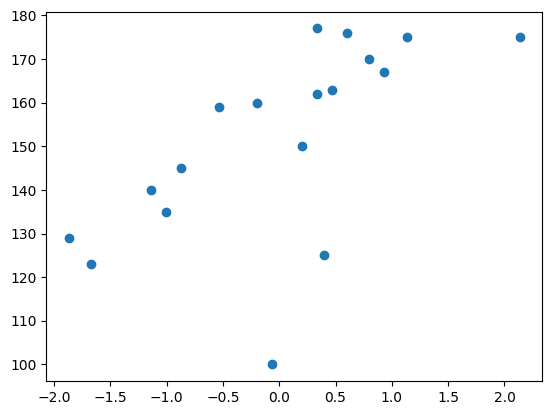

In [26]:
plt.scatter(x_train, y_train)

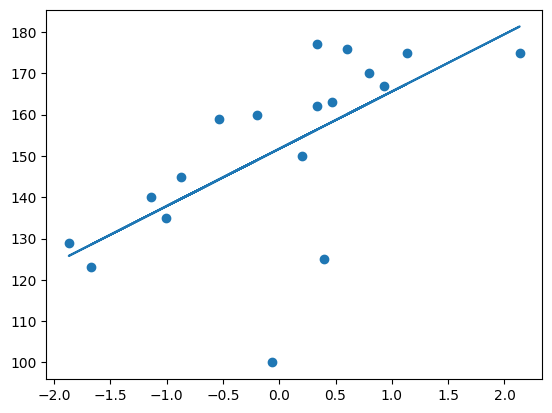

In [27]:
# Plot training data plot best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

##### From this plot we can see that the Intercept and the coeffienct is matched with the value what we find in the previous code.

### Prediction of test data
1. prediction height output = Intercept + coefficient(weight)
2. y_pred_test = 151.72+13.876(x_test)

In [28]:
# Prediction for the test data
y_pred = regression.predict(x_test)

In [29]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 239.22784338054723
Mean Absolute Error: 12.670552493994625
Root Mean Squared Error: 15.466992059885051


### R Square

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2Score = r2_score(y_test,y_pred)
print(f"R square value is: {r2Score}")

R square value is: 0.6730219156025994


In [33]:
# Display adjusted R-squared
1-(1-r2Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6076262987231192

In [34]:
## OLS Linear Regression
import statsmodels.api as sm

In [35]:
model = sm.OLS(y_train, x_train).fit()

In [36]:
prediction = model.predict(x_test)
print(prediction)

[ 20.36795252 -21.29376855 -25.92284866   1.85163205  20.36795252
   4.62908012  24.99703264]


In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1405
Date:                Sun, 18 Aug 2024   Prob (F-statistic):                       0.712
Time:                        01:35:01   Log-Likelihood:                         -116.04
No. Observations:                  18   AIC:                                      234.1
Df Residuals:                      17   BIC:                                      235.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
# Prediction for new data
regression.predict([[72]])

array([1150.86260052])

##### The value above shows that for the new predict data for the weight of 72 KG, the height should be 1150.86 cm, which is quite impossible. So, this prdiction is wrong. Thats why we have to revise the model.

In [39]:
regression.predict(scaler.transform([[72]]))

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([150.7964062])

##### Now this value is possible. So, always we have remember that scaler is very very important for the prediction data. 